<a href="https://colab.research.google.com/github/TheMasterEngine/data/blob/master/Tarea_2_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.upla.cl/normasgraficas/wp-content/uploads/2016/01/logo_upla.png" title="Title text" width="35%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> CIF 8458 Ingeniería del Conocimiento II-2020 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales y Aprendizaje No supervisado </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Aprendizaje No Supervisado


** Formalidades **  
* Se debe realizar un jupyter notebook con los pasos, descripciones, análisis y conclusiones.
* La tarea es individual, la copia parcial o total será penalizada con nota 1.
* La entrega de la tarea se realizará en el sistema <em>eaula </em> (se debe adjuntar el archivo .ipynb).
* Fecha de Entrega: Domingo 6 de Diciembre, 23:00 horas. 
* El sistema no aceptarán tareas con retraso.
* Debe estar preparad@ para presentar su tarea en horario a determinar. 
* La Nota del informe se calcula: $\left(\frac{\mbox{suma de puntos obtenidos}*6}{50}\right)+1$

<hr style="height:2px;border:none"/>

**Uso de google colab**
Se recomienda el uso de google colab para evitar usar los recursos de su computador local.

**Paquetes instalación**
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de anaconda (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como sklearn, una librería simple y de facil acceso para data science, keras en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como backend TensorFlow o Theano, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de computer science como numpy, matplotlib, pandas, además de claramente jupyter.

Descargar anaconda

Luego de instalar Anaconda y tenerla en el path de su computador crear un entorno virtual:

conda create -n redesneuronales python=version
con version, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 (es decir, python = 3) debido a dependencias con una de las librerías a utilizar.

Acceder al ambiente creado

source activate redesneuronales
Instalar los paquetes a utilizar

conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu
(Si no tienen gpu instalan los paquetes keras y tensorflow en luegar de keras-gpu y tensorflow-gpu)

Para salir del entorno
source deactivate redesneuronales


**Observaciones**
La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. 

# 1 - Redes Feed Forward para predecir la resistencia a la compresión del hormigón

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa estan conectadas a todos los inputs y envian su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient_ y el _exploding gradient_, viendo también algunos optimizadores existentes. 

Para realizar esto, utilizaremos una base de datos con información para determinar la resistencia a la compresión del hormigón (material muy importante para la construcciones, más para nosotros que vivimos en una zona sísmica), la cual se encuentra en el repositorio de datos de la Universidad de California, Irvine, en la siguiente URL: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength. El dataset cuenta con 1030 registros, donde podemos encontrar la edad del hormigón y la información de sus ingredientes. 
Nuesta tarea durante esta pregunta será predecir la resistencia a la compresión del hormigón.

<img src="https://civildigital.com/wp-content/uploads/2016/07/Compressive-Strength-test-for-M25-Concrete.jpg" title="Title text" width="35%" height="20%" />

### 1.a Carga de datos y primeros analisis
(1 pto) Cargue los datos en un _dataframe_ como muestra el código. Explore superficialmente los datos utilizando los metodos `.head`, `.describe` o `.info` del _DataFrame_ y comente.

In [1]:
import pandas as pd

df_tr = pd.read_excel("/Concrete_Data.xls")

In [2]:
df_tr.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Comentario: Se puede observar que hay algunas filas con valores cero al comienzo del dataframe

In [3]:
df_tr.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Comentario: Se observa que no faltan valores gracias al metodo count, la media de la columna Fly Ash es cero.

In [4]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Comentario: Son 9 columnas en total, tienen todos sus valores, y son todos de tipo numérico.

### 1.b Estandarización y Train Test Split
(2 pts) En esta pregunta nos ocuparemos de separar el _dataset_ en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular las funciones `StandarScaler` y `train_test_split`.

Para esto separe primero el dataset en $X$ e $Y$. Luego separe los datos considerando un $70\%$ de ellos para entrenamiento, un $20\%$ para validación y un $10\%$ para test. Finalmente ajuste los _scalers_ con los datos de entrenamiento y transforme los datos. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_tr.iloc[:,:8]
Y = df_tr.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2222, random_state=42)

scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_train_norm = scaler_x.transform(x_train)
x_val_norm = scaler_x.transform(x_val)
x_test_norm = scaler_x.transform(x_test)

¿Qué operación matemática realiza StandarScaler al momento de tranformar los datos?   
R: z = (x - u)/s;
u: es la media de las muestras de entrenamiento, s: es la desviación estandar de las muestras de entrenamiento.

¿Por qué debemos transformar los datos de validación y de test con el scaler ajustado a los datos de entrenamiento?
R: La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático porque podrían comportarse mal si las características individuales no se parecen más o menos a datos estándar distribuidos normalmente.

¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?
R: Se quiere obtener los conjuntos de los datos que se usarán para realizar el entrenamiento de la red, el conjunto que realizará la validación del entrenamiento, y el conjunto con los datos que se usarán para hacer las pruebas a la red.

### 1.c Primera Red
(6 pts) En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciaran estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Mean Square Error_ para obtener resultados comparables entre distintos modelos. Para entrenar esta red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_. 

* Construya la red basandose en el código y la documentación de keras. 

In [6]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

ANN = Sequential()

# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu', input_dim=8))
# Output Layer
ANN.add(Dense(units = 1))
ANN.compile(optimizer=SGD(learning_rate = 0.002), loss='mse')

Una forma fácil de instanciar la red es la propuesta en el codigo abajo, es decir entrenar la red por 0 _epochs_. Una red instanciada nos permite utilizar el método `.summary` para ver su número de parametros y los tamaños de cada capa.

In [7]:
ANN.fit(x_train_norm, y_train, epochs=0)
ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros? R: bueno al parecer al multiplicar 9 por 256 nos da el número de parametros 2304, siendo 9: el número de entradas a la red o columnas del dataframe, y 256: el número de neuronas ocultas.

La capa de salida tiene solo 1 neurona y tiene 257 parámetros los que al sumarlos con los parametros de la capa oculta nos da el total de parámetros que es: 2.561

[texto del vínculo](https://)

* Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

In [8]:
history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val))

Epoch 1/20
23/23 [==============================] - 0s 7ms/step - loss: 861.0524 - val_loss: 176.3253
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 151.6346 - val_loss: 128.2863
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 129.6281 - val_loss: 124.4733
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 123.0177 - val_loss: 125.8040
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 119.3080 - val_loss: 117.1803
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 115.6690 - val_loss: 114.8788
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 114.4782 - val_loss: 113.5059
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 112.1883 - val_loss: 110.6415
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 109.5713 - val_loss: 107.0857
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 108.0715 

In [9]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


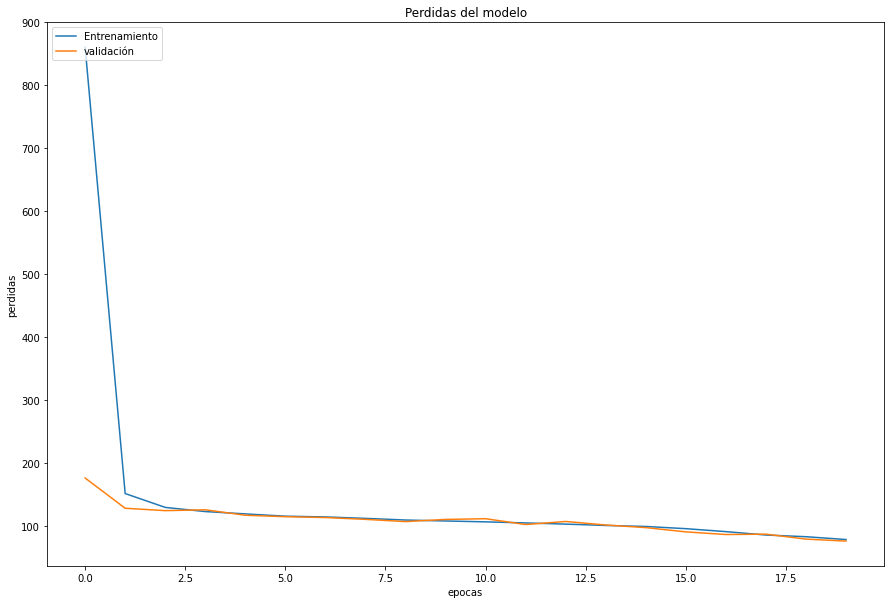

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validación'], loc='upper left')
plt.show()

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

Comentario: Al comienzo el error de entrenamiento es muy alto, pero luego cae drasticamente hasta mantenerse siempre en descenso, en cambio el error de test siempre se mantiene bajo y sigue en descenso de manera gradual.

* Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos dos valores mayores y dos valores menores al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _calback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

* Grafique el comportamiento de los errores de validación y entrenamiento para a lo menos un valor mayor y uno menor al original y comente.

In [11]:
import matplotlib.pyplot as plt
from keras.callbacks import TerminateOnNaN
terminate = TerminateOnNaN()
import tensorflow as tf



def neurona(lr):
  tf.random.set_seed(2) 
  ANN = Sequential()
  # Hidden Layer
  ANN.add(Dense(units = 256, activation = 'relu',input_dim=8))
  # Output Layer
  ANN.add(Dense(units = 1))
  ANN.compile(optimizer=SGD(learning_rate = lr), loss='mse')
  
  history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val), callbacks=[terminate])
  
  plt.figure(figsize=(15,10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
  plt.show()

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 372.0789 - val_loss: 294.8622
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 293.6236 - val_loss: 260.5899
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 448.0637 - val_loss: 180.7852
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 186.3342 - val_loss: 229.5707
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 166.0452 - val_loss: 144.1160
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 284.6261 - val_loss: 148.4859
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 119.3784 - val_loss: 131.5211
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 133.0496 - val_loss: 466.3113
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 172.0557 - val_loss: 224.1998
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 121.0317 

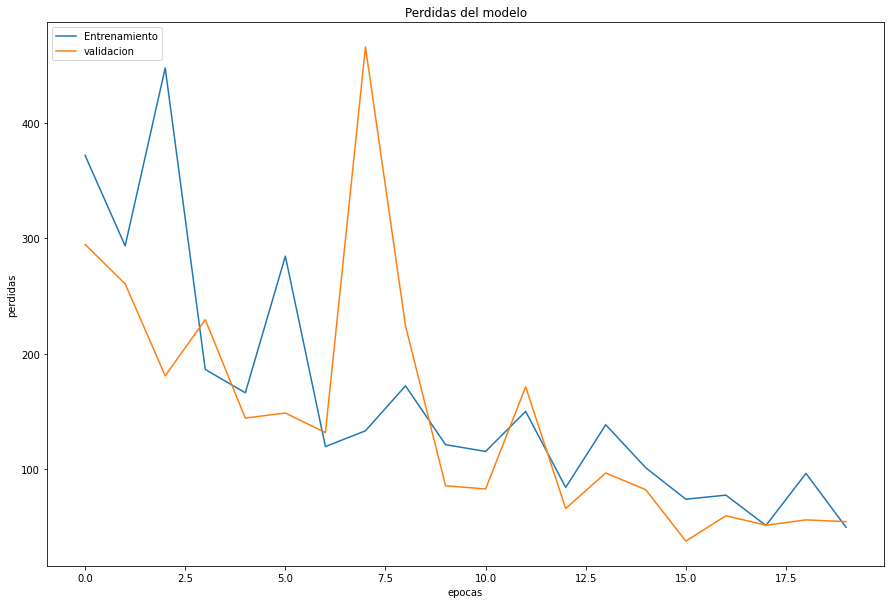

In [12]:
neurona(0.02)

learning_rate más grande, se puede ver el error de entrenamiento más o menos parejo siempre en descenso, y el error de test es constante hasta el final donde se eleva hasta causar un error que detiene la función.

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 342.8572 - val_loss: 135.5021
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 135.4537 - val_loss: 126.0346
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 140.0339 - val_loss: 112.2008
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 130.0589 - val_loss: 110.7259
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 108.0137 - val_loss: 100.0827
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 158.4814 - val_loss: 381.5734
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 108.2761 - val_loss: 71.2710
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 76.0720 - val_loss: 125.4414
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 91.9109 - val_loss: 449.8802
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 101.5318 - v

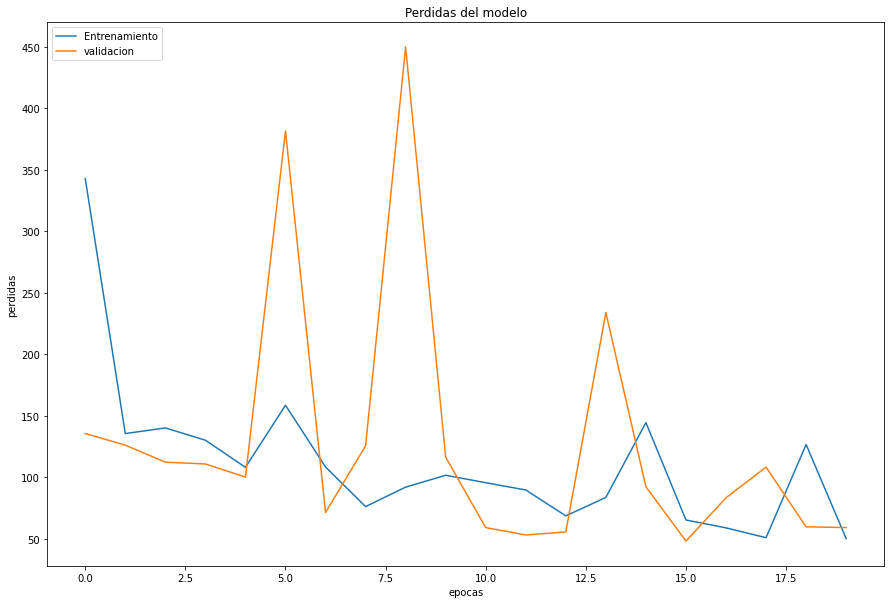

In [14]:
neurona(0.01)

learning_rate Más alto, aquí tambien se observa que el error del entrenamiento es relativamente constante y el de test tiene subidas y bajadas constantes

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 1542.5743 - val_loss: 1565.4098
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 1486.3094 - val_loss: 1505.0099
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 1428.2777 - val_loss: 1441.6438
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 1366.2374 - val_loss: 1371.8046
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 1297.1798 - val_loss: 1293.7046
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 1219.5552 - val_loss: 1206.0127
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 1132.3315 - val_loss: 1107.6740
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 1035.2175 - val_loss: 1000.1349
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 929.9866 - val_loss: 883.3694
Epoch 10/20
23/23 [==============================] - 0s 2ms/step -

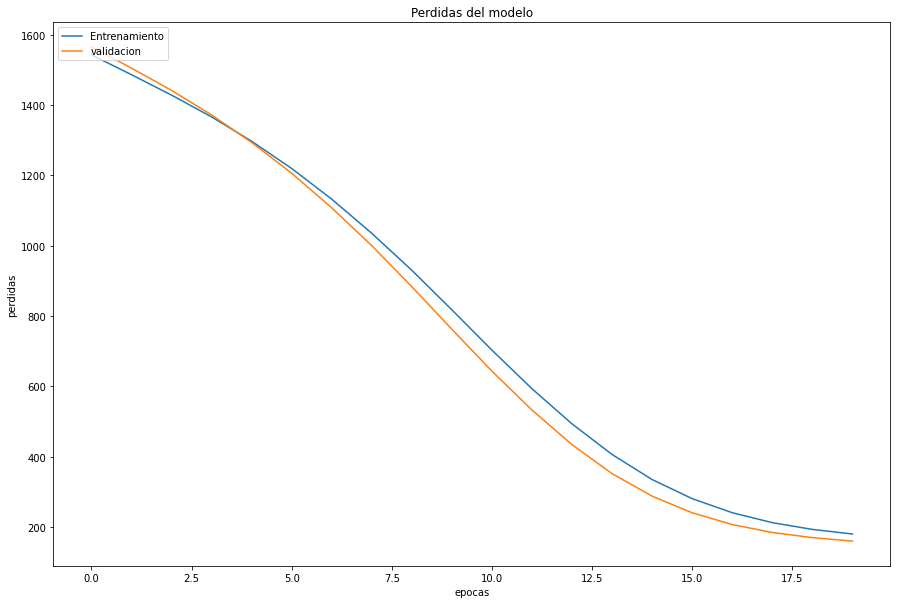

In [15]:
neurona(0.0001)

learning_rate más bajo, aquí se observa un problema al parecer, ya que, el error de entrenamiento es constantemente bajo y el error de test es constantemente alto.

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 1545.2041 - val_loss: 1571.3579
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 1494.5997 - val_loss: 1517.2300
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 1442.8735 - val_loss: 1461.1443
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 1388.3904 - val_loss: 1400.3938
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 1328.8016 - val_loss: 1333.6342
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 1262.9092 - val_loss: 1259.7242
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 1189.7117 - val_loss: 1177.4880
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 1108.5782 - val_loss: 1087.3800
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 1020.0755 - val_loss: 988.3168
Epoch 10/20
23/23 [==============================] - 0s 2ms/step 

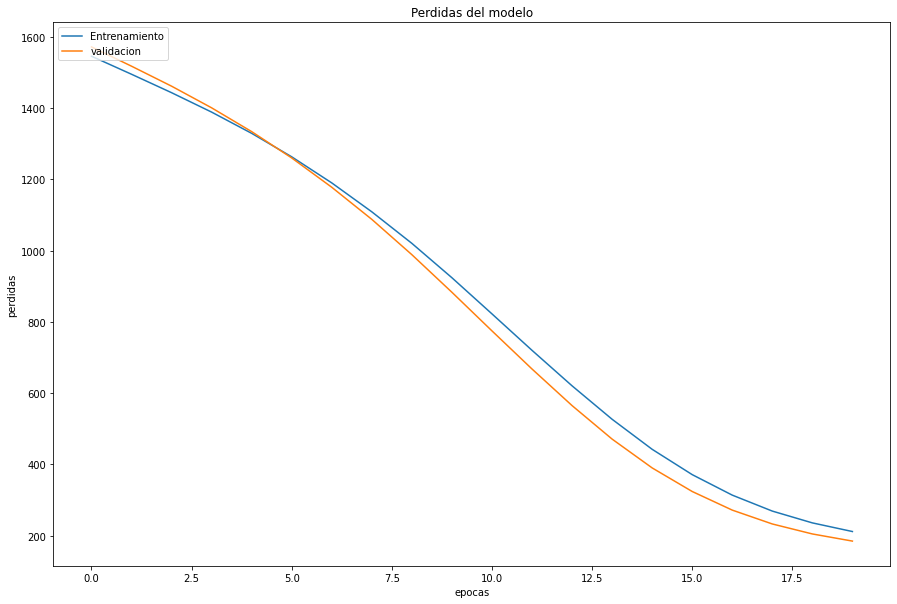

In [16]:
neurona(0.00009)

learning_rate Más bajo, aqué se observa que ambos errores comienzan altos, pero van disminuyendo de manera constante y en conjunto.

### 1.d Activación y regularizadores $l$1 $l$2
(4 pts) En esta pregunta se les propone explorar distintas funciones de activación o de regularización usual. Por lo extenso de la tarea se les propone elegir una de las dos exploraciones. En ambos casos deben entrenar la misma red entrenada anteriormente utilizando gradiente descendente con algun _learn rate_ que les parezca adecuado luego de la exploración en la pregunta anterior. 

* En caso de elegir explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, _softmax_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* En caso de elegir explorar las funciones de regularización usual, agregue regularización $l$1 o $l$2 a la capa oculta y pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

In [17]:
from keras.layers import LeakyReLU

def leakyRelu(alfa):
  ANN = Sequential()
  # Hidden Layer
  ANN.add(Dense(units = 256,input_dim=8))
  ANN.add(LeakyReLU(alpha=alfa))
  # Output Layer
  ANN.add(Dense(units = 1))
  ANN.compile(optimizer=SGD(learning_rate = 0.008), loss='mse')

  history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val))
  plt.figure(figsize=(15,10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
  plt.show()

In [18]:
def activation(tipo): 
  ANN = Sequential()
  # Hidden Layer
  ANN.add(Dense(units = 256, activation = tipo,input_dim=8))
  # Output Layer
  ANN.add(Dense(units = 1))
  ANN.compile(optimizer=SGD(learning_rate = 0.008), loss='mse')

  history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val))
  plt.figure(figsize=(15,10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
  plt.show()

Epoch 1/20
23/23 [==============================] - 0s 6ms/step - loss: 365.5839 - val_loss: 134.5775
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 131.9793 - val_loss: 124.7188
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 131.8338 - val_loss: 113.8495
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 120.8816 - val_loss: 112.6225
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 111.4605 - val_loss: 102.9287
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 120.5733 - val_loss: 117.4163
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 87.2321 - val_loss: 75.7666
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 74.0984 - val_loss: 85.4572
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 69.0842 - val_loss: 71.6090
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 64.0065 - val_l

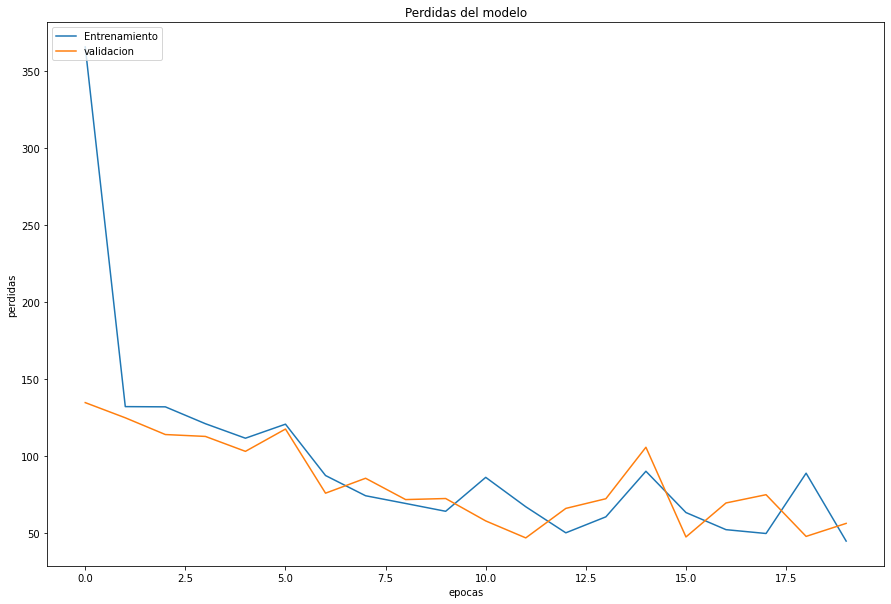

In [19]:
leakyRelu(0.005)

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 1203.9476 - val_loss: 929.6199
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 720.0124 - val_loss: 597.9926
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 488.3524 - val_loss: 438.3540
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 379.0576 - val_loss: 360.1380
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 326.2133 - val_loss: 321.6195
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 300.8739 - val_loss: 302.4511
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 289.1192 - val_loss: 293.3107
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 283.8222 - val_loss: 288.9458
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 281.4806 - val_loss: 286.3770
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 280.1917

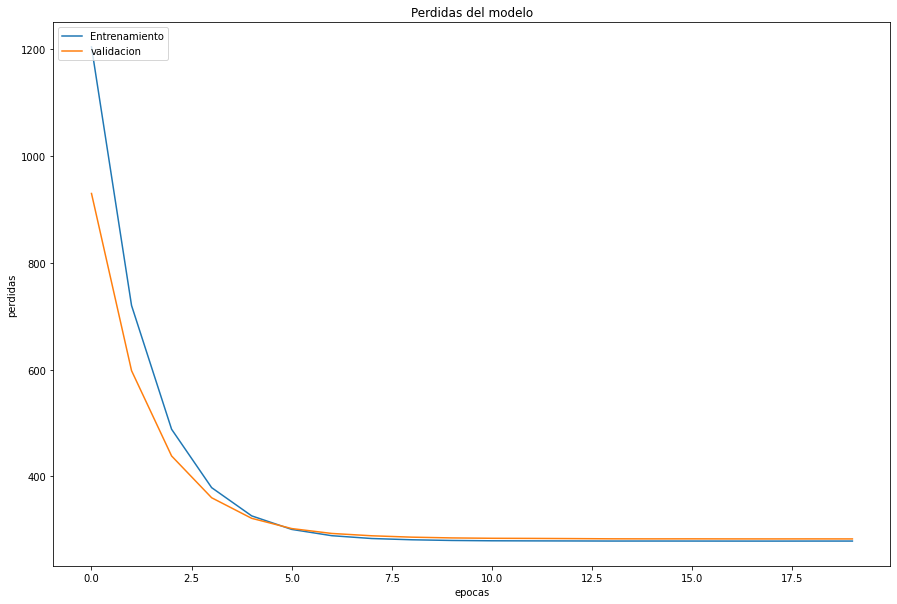

In [20]:
activation('softmax')

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 357.1141 - val_loss: 82.4930
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 87.0351 - val_loss: 76.2527
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 69.5523 - val_loss: 56.7269
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 70.2589 - val_loss: 60.5302
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 61.4580 - val_loss: 74.5089
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 63.3558 - val_loss: 59.9546
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 52.7837 - val_loss: 52.6962
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 52.1624 - val_loss: 50.2271
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 52.7028 - val_loss: 54.6884
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 48.5711 - val_loss: 81.713

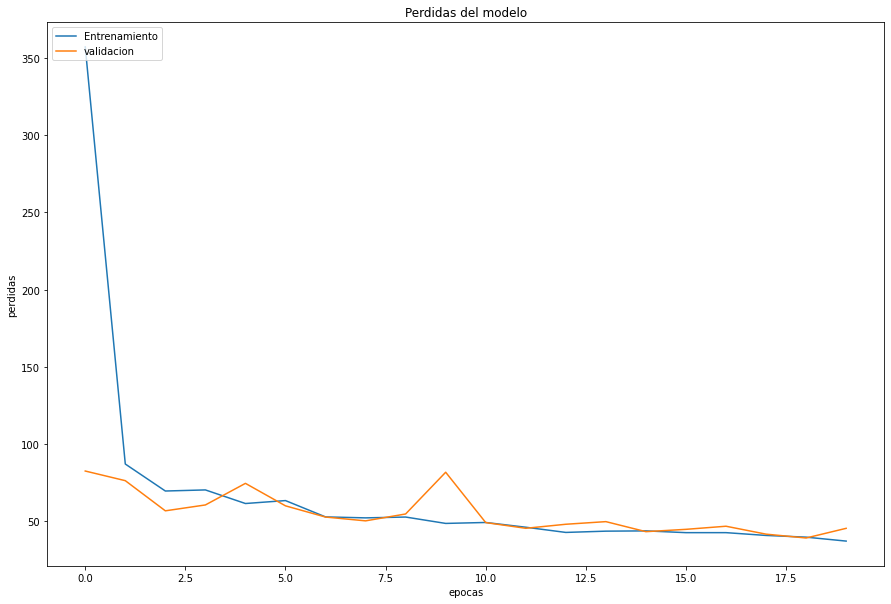

In [21]:
activation('tanh')

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 283.7741 - val_loss: 179.3137
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 147.4563 - val_loss: 123.6810
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 122.3989 - val_loss: 112.0604
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 116.9984 - val_loss: 107.7452
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 110.5548 - val_loss: 106.8817
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 112.5899 - val_loss: 102.2214
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 107.1388 - val_loss: 114.2946
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 104.2553 - val_loss: 97.7776
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 97.9212 - val_loss: 94.1189
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 97.6590 - va

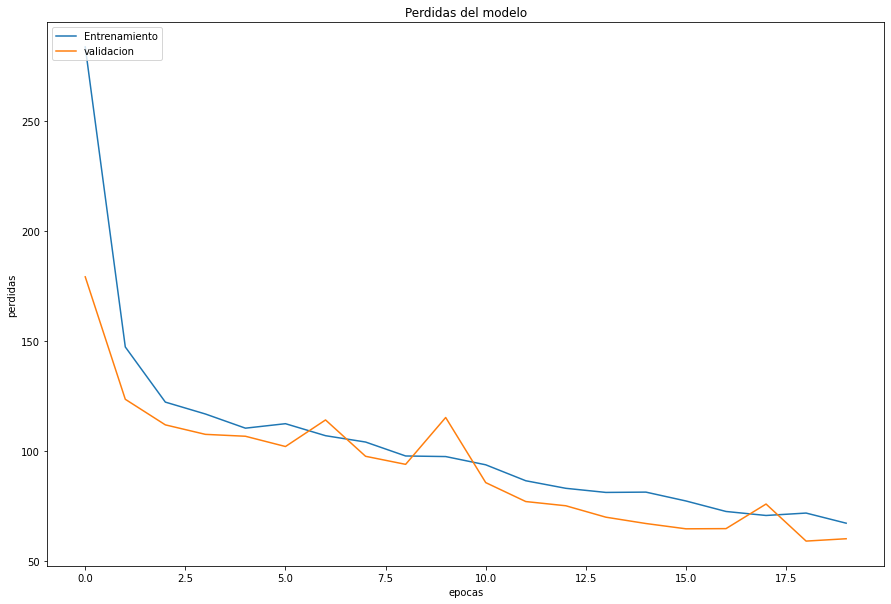

In [22]:
activation('sigmoid')

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 357.6205 - val_loss: 127.3727
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 130.6514 - val_loss: 134.5088
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 135.4545 - val_loss: 117.4519
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 129.8943 - val_loss: 117.6579
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 125.6169 - val_loss: 116.3039
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 143.1502 - val_loss: 142.4155
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 127.3627 - val_loss: 155.6544
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 133.6005 - val_loss: 130.3239
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 121.3595 - val_loss: 136.4129
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 129.7986 

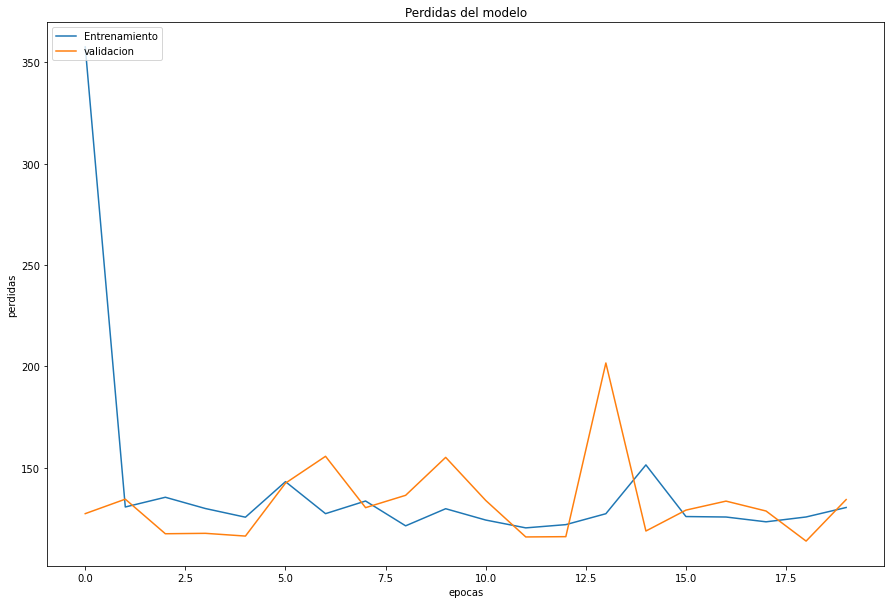

In [23]:
activation('linear')

Comentario general: Todas tienen en común que comienzan con errores altos, pero luego comienzan a descender progresivamente.

**Independiente de la opción elegida**, comente sobre los siguientes temas:


* ¿Cual es el interés de tener activaciones no lineales?
R: Las funciones de activación no lineales nos ayudan a modelar funciones curvas o no triviales.

* ¿Le parece buena opción la activación sigmoidea para la capa oculta?
 R: creo que es una buena opción, sin embargo como ya es antigua ahora de seguro hay activadores que funcionan mejor como relu.
  
* ¿Qué pasaría si usaramos esta activación en la capa de salida?
R: No funcionaria para predecir el target deseado, debido a que esta función de activación solo devuelve un rango acotado de valores, los cuales no representan los valores reales del target por lo que es totalmente disfuncional.

* ¿Cual es la intención de la regularización en general?
R: Cuando usamos regularización minimizamos la complejidad del modelo a la vez que minimizamos la función de coste. Esto resulta en modelos más simples que tienden a generalizar mejor. Los modelos que son excesivamente complejos tienden a sobreajustar. Es decir, a encontrar una solución que funciona muy bien para los datos de entrenamiento pero muy mal para datos nuevos.

* En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones.


### 1.e Exploración del Número de neuronas

(3 pts) Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrenen la red que estimen conveniente luego de la pregunta anterior, variando el numero de nuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [25]:
import numpy as np

train_error, val_error = [], []

for n_units in range(1,11):
  ANN = Sequential()
  ANN.add(Dense(units = pow(n_units, 2), activation = 'relu', input_dim=8))
  ANN.add(Dense(units = 1))
  ANN.compile(optimizer=SGD(learning_rate = 0.001), loss='mse')
  history = ANN.fit(x_train_norm, y_train, epochs=25, validation_data=(x_val_norm,y_val))
  val_error = val_error+[min(history.history['val_loss'])]
  train_error = train_error+[history.history['loss'][np.argmin(history.history['val_loss'])]]

Epoch 1/25
23/23 [==============================] - 0s 5ms/step - loss: 1353.6191 - val_loss: 1058.9690
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 684.8956 - val_loss: 242.3890
Epoch 3/25
23/23 [==============================] - 0s 2ms/step - loss: 163.3139 - val_loss: 129.5333
Epoch 4/25
23/23 [==============================] - 0s 2ms/step - loss: 124.1457 - val_loss: 119.7564
Epoch 5/25
23/23 [==============================] - 0s 2ms/step - loss: 119.4062 - val_loss: 116.2626
Epoch 6/25
23/23 [==============================] - 0s 2ms/step - loss: 117.2151 - val_loss: 117.6958
Epoch 7/25
23/23 [==============================] - 0s 2ms/step - loss: 115.5595 - val_loss: 118.2430
Epoch 8/25
23/23 [==============================] - 0s 2ms/step - loss: 115.1395 - val_loss: 116.3658
Epoch 9/25
23/23 [==============================] - 0s 2ms/step - loss: 113.7861 - val_loss: 114.2280
Epoch 10/25
23/23 [==============================] - 0s 2ms/step - loss: 113.619

In [26]:
val_error

[108.128173828125,
 91.3580093383789,
 103.32664489746094,
 97.25743103027344,
 100.36285400390625,
 99.62773132324219,
 98.93433380126953,
 99.66101837158203,
 100.97333526611328,
 95.53182983398438]

In [27]:
train_error

[112.91800689697266,
 98.86870574951172,
 105.8258285522461,
 99.05200958251953,
 102.90601348876953,
 101.22268676757812,
 101.0776138305664,
 101.49309539794922,
 102.607177734375,
 97.14141845703125]

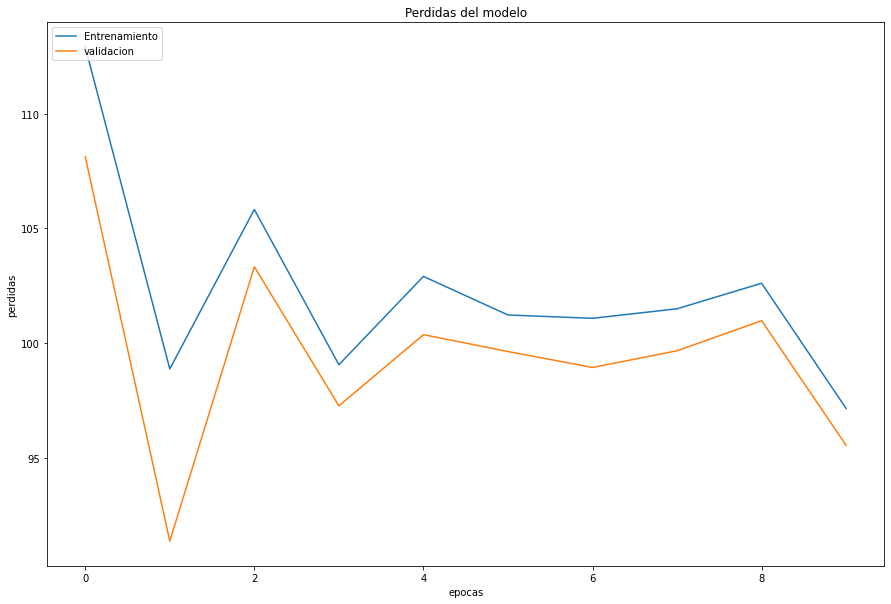

In [28]:
  plt.figure(figsize=(15,10))
  plt.plot(train_error)
  plt.plot(val_error)
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
  plt.show()

Comentario: Se aprecia que ambos errores se comportan de manera similar, sin embargo el error de test es más alto que el de entrenamiento durante todo el entrenamiento.

### 1.f Dropout
(3 pts) Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

Epoch 1/200
23/23 [==============================] - 0s 5ms/step - loss: 483.6282 - val_loss: 130.1064
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 159.6512 - val_loss: 126.3144
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 144.8547 - val_loss: 112.9536
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 131.0867 - val_loss: 112.3451
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 141.0851 - val_loss: 107.9357
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 139.6216 - val_loss: 108.7935
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 130.5471 - val_loss: 139.4261
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 121.5892 - val_loss: 99.9812
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 112.7931 - val_loss: 105.5546
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 

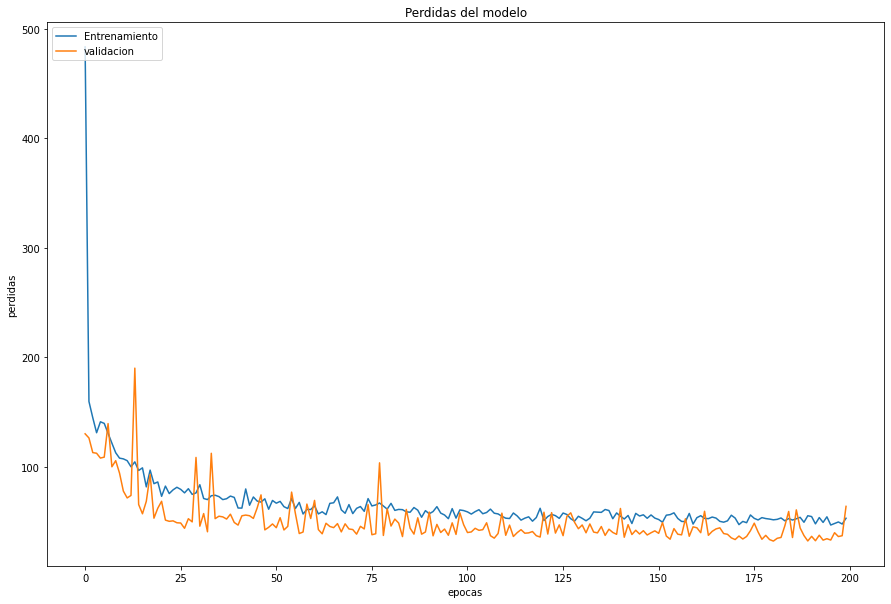

In [29]:
from keras.layers import Dropout

ANN = Sequential()
ANN.add(Dense(units = 200, activation = 'relu',input_dim=8))
ANN.add(Dropout(0.5))
ANN.add(Dense(units = 1))
ANN.compile(optimizer=SGD(learning_rate = 0.005), loss='mse')
history = ANN.fit(x_train_norm, y_train, epochs=200, validation_data=(x_val_norm,y_val))
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
plt.show()

¿Qué observa al agregar dropout? Comente y compare con sus resultados anteriores.
R: los erroes se vuelven menores siendo el de test menos parejo, pero siempre llendo en descenso.

¿en qué consiste el fenómeno de overfitting?
R: El overfitting consiste en sobreajustar los datos de entrenamiento dando como resultado que la red solo sea capaz de identificar los datos enseñados por ser demasiado especificos y al momento de entregarle datos nuevos no será capaz de predecir su  valor de manera correcta.

¿Por qué modelos más grandes suelen presentar el fenómeno?
R: debe ser porque hay datos que se repiten mucho y la red se sobreajusta debido a que los valores repetidos logran posicionarse por sobre el resto.

### 1.g Extreme Learning Machine

(2 pts) Otra aproximación para obtener modelos grandes que no sobreajustan es la implementada por _ELM_. Explique en qué consiste la idea de _ELM_ y porqué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros. 

Entrene una _ELM_ de una capa fija y una capa oculta, la primera con un número relativamente grande y la segunda con un número relativamente pequeño. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes. 

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

Explique en qué consiste la idea de ELM. 

R: Se usa ampliamente en el aprendizaje por lotes, el aprendizaje secuencial y el aprendizaje incremental debido a su velocidad de aprendizaje rápida y eficiente, su rápida convergencia, su buena capacidad de generalización y su facilidad de implementación. 

y porqué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros.

R: su estructura consta de una sola capa de nodos ocultos, donde los pesos entre entradas y ocultos. Los nodos se asignan al azar y permanecen constantes durante las fases de entrenamiento y predicción.

In [33]:
ANN = Sequential()
ANN.add(Dense(units=5000,activation='relu',input_dim=8))
ANN.add(Dense(units=32, activation='relu'))
ANN.add(Dense(1))
ANN.layers[0].trainable = False
ANN.compile(optimizer=SGD(learning_rate = 0.002), loss='mse')

In [34]:
ANN.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 5000)              45000     
_________________________________________________________________
dense_68 (Dense)             (None, 32)                160032    
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 33        
Total params: 205,065
Trainable params: 160,065
Non-trainable params: 45,000
_________________________________________________________________


Epoch 1/20
23/23 [==============================] - 0s 8ms/step - loss: 669.7874 - val_loss: 205.9938
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 198.4550 - val_loss: 173.0196
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 169.8242 - val_loss: 151.4643
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 147.6499 - val_loss: 130.0083
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 124.3995 - val_loss: 111.7747
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 108.2387 - val_loss: 102.7026
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 93.4338 - val_loss: 92.4668
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 83.0365 - val_loss: 79.8490
Epoch 9/20
23/23 [==============================] - 0s 4ms/step - loss: 74.9575 - val_loss: 82.2993
Epoch 10/20
23/23 [==============================] - 0s 4ms/step - loss: 68.6766 - val_l

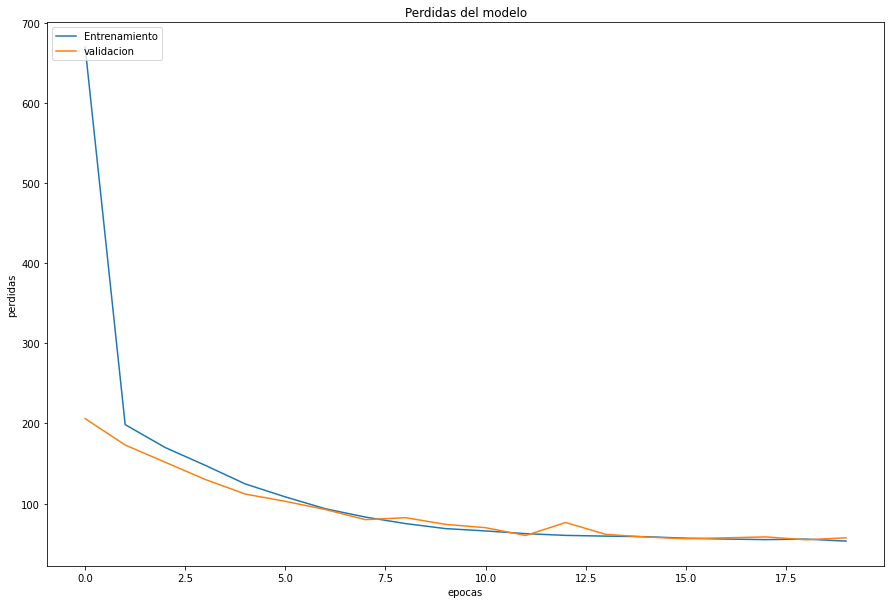

In [35]:
history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val))
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
plt.show()

Comentarios: Se obserba que por primera vez hasta ahora en este trabajo hay parámetros no entrenables y son bastantes, puede que si haya overfitting, pero no esta comprobado, el error de test sube y baja, mientras que el de entrenamiento esta constante abajo.

### 1.h Learning Rate Decay
(3 pts) Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 867.1566 - val_loss: 161.3635
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 151.4848 - val_loss: 129.7382
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 131.1515 - val_loss: 128.2430
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 123.0981 - val_loss: 112.6328
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 119.2323 - val_loss: 110.4456
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 116.2744 - val_loss: 114.2009
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 113.1799 - val_loss: 119.6779
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 112.6230 - val_loss: 112.0626
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 109.1026 - val_loss: 110.1937
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 106.6960 

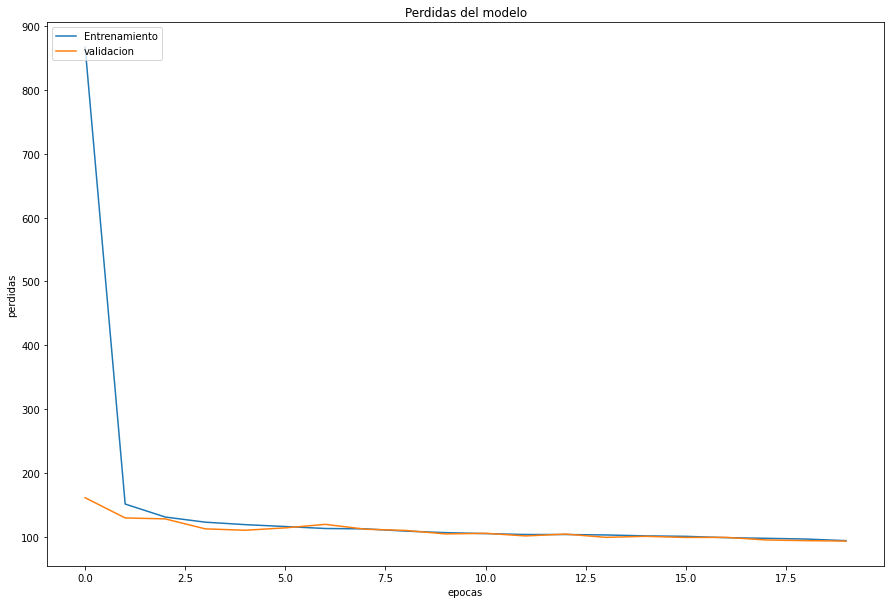

In [37]:
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
  initial_lrate = 0.002
  drop = 0.5
  epochs_drop = 10.0
  lr = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))

  if lr > (5 * math.pow(10, -5)):
    return lr
  else:
    lr = 5 * math.pow(10, -5)
    return lr

schedule = LearningRateScheduler(step_decay)

ANN = Sequential()
ANN.add(Dense(units=256,activation='relu',input_dim=8))
ANN.add(Dense(units=1))
ANN.compile(optimizer=SGD(learning_rate = 0.002), loss='mse')
history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val), callbacks=[schedule])
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
plt.show()

Comentarios: es util disminuir el learning rate porque la red disminuye el error tanto de train como de test considerablemente como se aprecia en el grafico.

### 1.i Vanishing Gradient

(4 pts) El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

In [39]:
ANN = Sequential()

# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu',input_dim=8))
ANN.add(Dense(units = 256, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
# Output Layer
ANN.add(Dense(units = 1))
ANN.compile(optimizer=SGD(learning_rate = 0.00005),loss='mse')

In [40]:
def pesos(text):
  for i in range(len(ANN.layers)):
    layer_kernel_weights = ANN.get_layer(index=i).get_weights()[0]
    layer_bias_weight = ANN.get_layer(index=i).get_weights()[1]

  plt.title(text)
  plt.hist(layer_kernel_weights, bins = 10, alpha=1, edgecolor = 'black',  linewidth=1)
  plt.show()

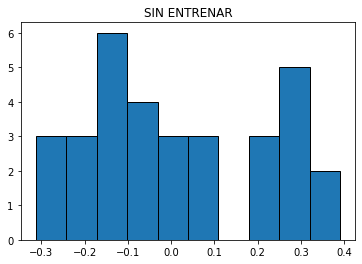

In [41]:
pesos('SIN ENTRENAR')

In [42]:
history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val))

Epoch 1/20
23/23 [==============================] - 0s 8ms/step - loss: 1553.1521 - val_loss: 1599.6948
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 1536.8805 - val_loss: 1581.3055
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 1516.3197 - val_loss: 1555.9196
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 1485.5731 - val_loss: 1513.9771
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 1428.2349 - val_loss: 1422.6617
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 1264.5647 - val_loss: 1075.2808
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 573.1997 - val_loss: 206.0257
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 210.8080 - val_loss: 184.8449
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 188.4101 - val_loss: 171.3391
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - los

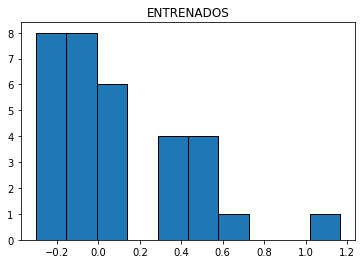

In [43]:
pesos('ENTRENADOS')

Comentario: primero observo que despues de entrenar el valor de algunos pesos disminuyo mientras que otros se mantuvieron igual.

In [44]:
from keras.initializers import glorot_uniform
ANN = Sequential()

initializer = glorot_uniform()
# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu',input_dim=8, kernel_initializer=initializer))
ANN.add(Dense(units = 256, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
# Output Layer
ANN.add(Dense(units = 1))
ANN.compile(optimizer=SGD(learning_rate = 0.0001),loss='mse')

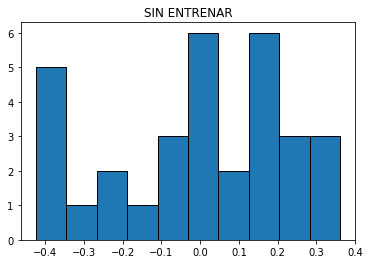

In [45]:
pesos('SIN ENTRENAR')

In [46]:
history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val))

Epoch 1/20
23/23 [==============================] - 0s 8ms/step - loss: 1545.6387 - val_loss: 1582.2087
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 1498.6774 - val_loss: 1499.6993
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 1242.8130 - val_loss: 567.4716
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 254.3865 - val_loss: 176.4037
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 182.6997 - val_loss: 157.9324
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 162.0505 - val_loss: 153.3995
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 145.2254 - val_loss: 138.6201
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 132.0260 - val_loss: 124.3088
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 117.4718 - val_loss: 114.2050
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 106.

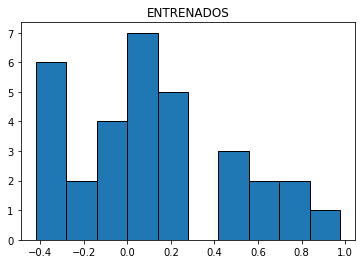

In [47]:
pesos('ENTRENADOS')

Comentario: al aplicar glorot_uniform los pesos se estabilizaron, centrandose como se aprecia en el histograma

### 1.j Otros Optimizadores

(3 pts) Finalmente, utilizando la estructura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente vainilla. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros) o modificar los parámetros que no hemos utilizado del gradiente descendente (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento, la velocidad de convergencia y el desempeño final alcanzado. Apoyese de gráficos. 

In [48]:
ANN = Sequential()

# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu', input_dim=8))
# Output Layer
ANN.add(Dense(units = 1))

Epoch 1/20
23/23 [==============================] - 0s 6ms/step - loss: 861.3391 - val_loss: 165.1114
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 155.4146 - val_loss: 132.3225
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 133.1156 - val_loss: 128.4977
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 124.0346 - val_loss: 113.1105
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 119.3900 - val_loss: 110.5933
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 116.0677 - val_loss: 113.4425
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 112.5616 - val_loss: 118.9038
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 111.9271 - val_loss: 111.4451
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 108.4912 - val_loss: 109.7897
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 106.2568 

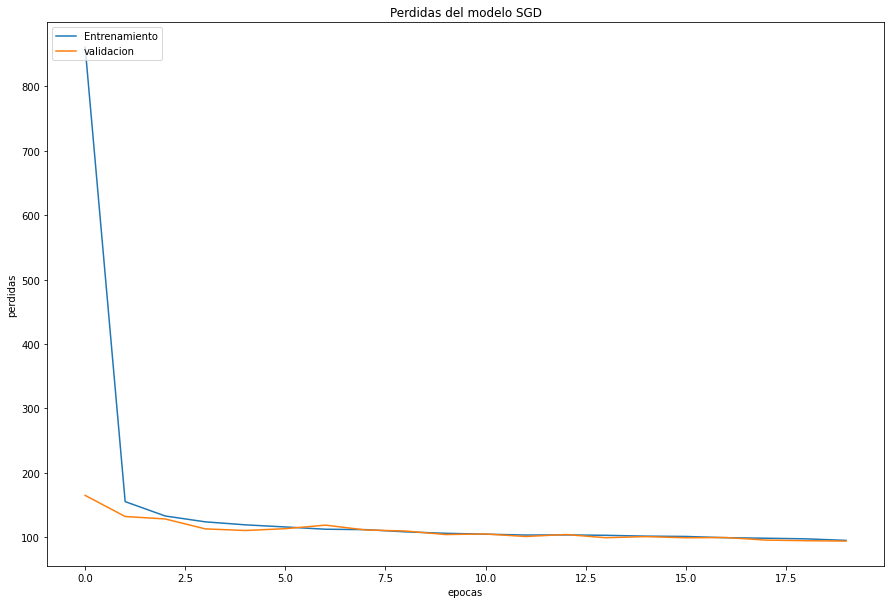

In [49]:
from keras.optimizers import SGD
ANN.compile(optimizer=SGD(learning_rate = 0.002), loss='mse')

history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val), callbacks=[schedule])
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo SGD')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
plt.show()

Epoch 1/20
23/23 [==============================] - 0s 6ms/step - loss: 95.1408 - val_loss: 90.5679
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 90.1468 - val_loss: 86.8077
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 86.9904 - val_loss: 85.3820
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 84.1455 - val_loss: 79.5597
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 80.6250 - val_loss: 76.2073
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 77.2184 - val_loss: 74.6153
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 73.8652 - val_loss: 72.1890
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 71.0321 - val_loss: 68.5273
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 67.7939 - val_loss: 65.3402
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 64.8247 - val_loss: 63.0245

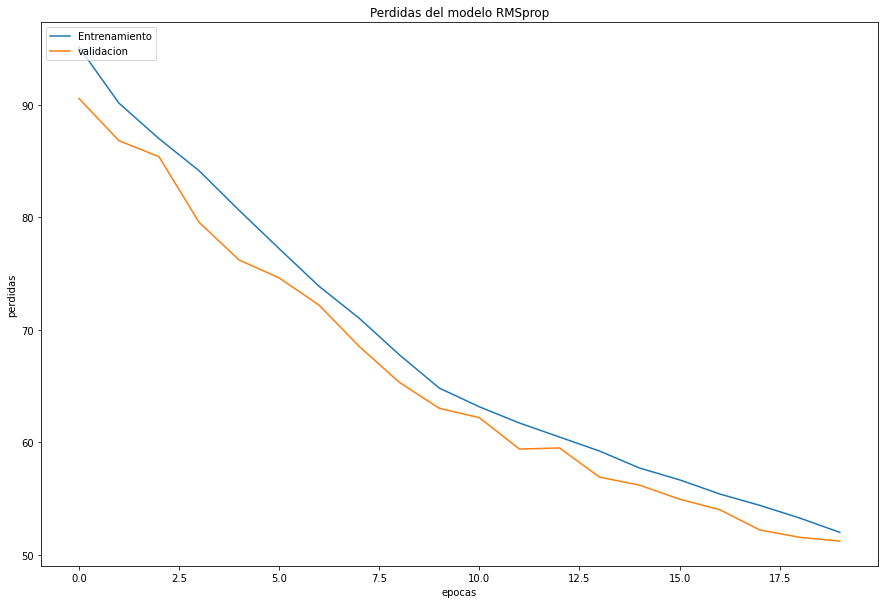

In [50]:
from keras.optimizers import RMSprop
ANN.compile(optimizer=RMSprop(learning_rate = 0.002), loss='mse')

history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val), callbacks=[schedule])
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo RMSprop')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
plt.show()

Epoch 1/20
23/23 [==============================] - 0s 5ms/step - loss: 52.7183 - val_loss: 51.0203
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 49.9755 - val_loss: 47.8358
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 48.0398 - val_loss: 46.7093
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 46.6666 - val_loss: 45.7149
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 45.6124 - val_loss: 44.8422
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 44.3403 - val_loss: 45.2610
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 43.9903 - val_loss: 43.6341
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 42.2978 - val_loss: 43.9962
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 42.1395 - val_loss: 43.2884
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 40.5814 - val_loss: 42.3011

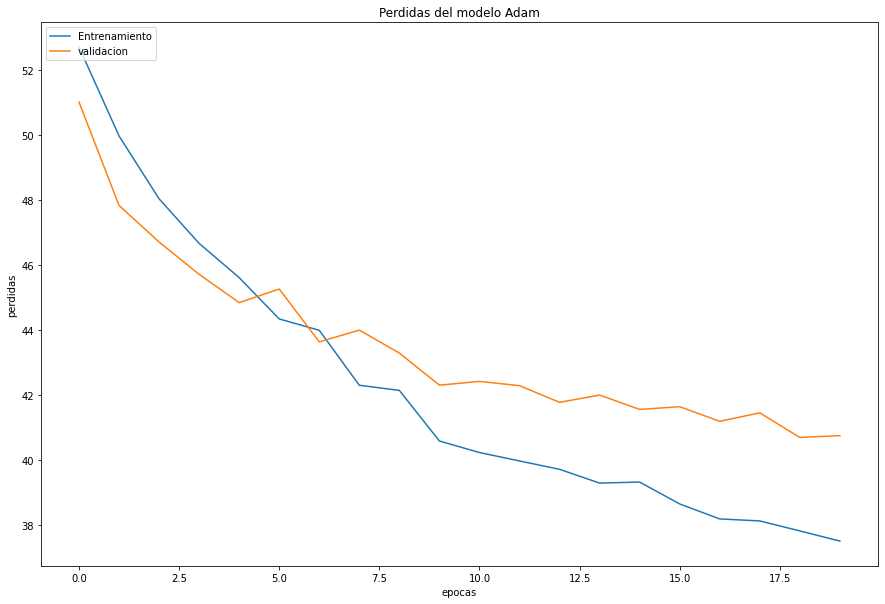

In [51]:
from keras.optimizers import Adam
ANN.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

history = ANN.fit(x_train_norm, y_train, epochs=20, validation_data=(x_val_norm,y_val), callbacks=[schedule])
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo Adam')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
plt.show()

### 1.k Testing 

(4 pts) Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error cuadrático medio de la predicción realizada sobre el _Test set_. Para puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? Si su curiosidad es suficiente, puede calcular el error real de su modelo transformando nuevamente el _target_ y su predicción a la escala original (utilizando su `scaler`) y tranformando a precio aplicando exponenciación (pues Y estaba espresado en escala logaritmica).

In [52]:
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
import tensorflow as tf

tf.random.set_seed(2) 
initializer = glorot_uniform()
ANN = Sequential()
ANN.add(Dense(units = 256, activation = 'relu', input_dim=8, kernel_initializer=initializer))
ANN.add(Dense(units = 1))
ANN.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

In [53]:
ANN.fit(x_train_norm, y_train, epochs=200, validation_data=(x_val_norm,y_val))

Epoch 1/200
23/23 [==============================] - 0s 6ms/step - loss: 1480.1823 - val_loss: 1422.9506
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 1281.4386 - val_loss: 1179.6582
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 1018.2568 - val_loss: 861.4551
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 708.4754 - val_loss: 529.2979
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 427.2585 - val_loss: 294.2346
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 261.1917 - val_loss: 200.0078
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 205.4199 - val_loss: 175.1239
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 184.2381 - val_loss: 165.0962
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 173.5972 - val_loss: 156.4836
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - 

In [54]:
prediccion = ANN.predict(x_test_norm)

In [55]:
y_new = prediccion[np.argmax(prediccion)]

In [56]:
print(y_new)

[75.15157]


In [57]:
y_test

31     52.908320
109    55.895819
136    74.497882
88     35.301171
918    10.535193
         ...    
803    19.105380
625    32.922479
568    25.447870
854    41.940825
39     36.251959
Name: Concrete compressive strength(MPa, megapascals) , Length: 103, dtype: float64

In [58]:
prediccion

array([[46.883183 ],
       [45.345776 ],
       [70.09585  ],
       [40.747032 ],
       [12.096616 ],
       [48.58701  ],
       [28.088854 ],
       [55.339878 ],
       [34.42596  ],
       [43.50594  ],
       [37.35939  ],
       [ 7.322385 ],
       [47.812695 ],
       [39.887936 ],
       [28.503803 ],
       [21.947231 ],
       [35.01972  ],
       [19.116066 ],
       [35.110153 ],
       [30.462666 ],
       [37.121532 ],
       [35.552143 ],
       [52.7151   ],
       [ 9.279029 ],
       [31.224173 ],
       [41.8297   ],
       [ 9.918181 ],
       [48.191013 ],
       [51.586845 ],
       [15.822612 ],
       [45.145863 ],
       [36.994865 ],
       [47.282784 ],
       [60.2357   ],
       [18.727966 ],
       [40.276443 ],
       [33.95367  ],
       [46.543995 ],
       [12.313001 ],
       [51.985966 ],
       [15.369146 ],
       [ 5.088806 ],
       [39.290268 ],
       [54.334034 ],
       [ 8.360242 ],
       [75.15157  ],
       [48.291004 ],
       [36.70

 <a id="segundo"></a>
# 2. Clasificando granos de trigo usando Aprendizaje No Supervisado

En esta sección utilizaremos el dataset Seeds que contiene información de mediciones de propiedades geométricas de granos de trigo pertenecientes a tres variedades: Kama, Rosa y Canadian. Para estudiar la estructura interna del grano se utilizó una técnica de rayos X de baja energía. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/seeds.


<img src="https://i2.wp.com/pakchinanews.pk/wp-content/uploads/2017/11/Wheat-e1511163298450.png?fit=560%2C315" title="Title text" width="40%"/>

### 2.a) Carga de Datos

(1 pto) Construya un dataframe con los datos a analizar. 
Describa brevemente el dataset utilizar.

In [168]:
import pandas as pd
 
url = '/seeds_dataset.xlsx'
df = pd.read_excel(url,header=None, names=['AREA', 'PER', 'COMP', 'LEN', 'WID', 'ASYM', 'LGR','CLASS']) 

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AREA    210 non-null    float64
 1   PER     210 non-null    float64
 2   COMP    210 non-null    float64
 3   LEN     210 non-null    float64
 4   WID     210 non-null    float64
 5   ASYM    210 non-null    float64
 6   LGR     210 non-null    float64
 7   CLASS   210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [170]:
df.describe()

,AREA,PER,COMP,LEN,WID,ASYM,LGR,CLASS
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,149.569657,5029.572975,3025.713905,3455.861715,4804.842143,2.000000
std,2.909699,1.305959,562.897276,1816.714479,987.338609,1759.646491,1762.646584,0.818448
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,4.830000,1.000000
25%,12.270000,13.450000,0.859450,5176.000000,2879.750000,2248.250000,4957.250000,1.000000
50%,14.355000,14.320000,0.878100,5452.500000,3206.500000,3528.500000,5175.500000,2.000000
75%,17.305000,15.715000,0.898475,5978.750000,3522.250000,4708.750000,5840.000000,3.000000
max,21.180000,17.250000,5163.000000,6675.000000,5443.000000,8456.000000,6735.000000,3.000000


In [171]:
df

,AREA,PER,COMP,LEN,WID,ASYM,LGR,CLASS
0,15.26,14.84,871.0000,5763.00,3312.0,2221.0,5.22,1
1,14.88,14.57,0.8811,5554.00,3333.0,1018.0,4956.00,1
2,14.29,14.09,905.0000,5291.00,3337.0,2699.0,4825.00,1
3,13.84,13.94,0.8955,5324.00,3379.0,2259.0,4805.00,1
4,16.14,14.99,0.9034,5658.00,3562.0,1355.0,5175.00,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5137.00,2981.0,3631.0,4.87,3
206,11.23,12.88,0.8511,5.14,2795.0,4325.0,5003.00,3
207,13.20,13.66,0.8883,5236.00,3232.0,8315.0,5056.00,3
208,11.84,13.21,0.8521,5175.00,2836.0,3598.0,5044.00,3


### 2.b) Preprocesamiento

(2 pts) Normalice los datos antes de trabajar. ¿Es necesario separar  los datos en entrenamiento y test?

R: no es necesario porque al se aprendizaje no supervisado no necesita utilizar el target para entrenar.

In [172]:
from sklearn.preprocessing import StandardScaler
targets = df.pop('CLASS')
scaler = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaler, columns=df.columns)

In [173]:
df_scaled

,AREA,PER,COMP,LEN,WID,ASYM,LGR
0,0.142098,0.215462,1.284700,0.404675,0.290650,-0.703444,-2.729470
1,0.011188,0.008224,-0.264780,0.289358,0.311970,-1.388737,0.085961
2,-0.192067,-0.360201,1.345246,0.144245,0.316031,-0.431149,0.011463
3,-0.347091,-0.475333,-0.264754,0.162453,0.358672,-0.681797,0.000090
4,0.445257,0.330595,-0.264740,0.346741,0.544461,-1.196764,0.210503
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,-0.264785,0.059274,-0.045396,0.099768,-2.729669
206,-1.246235,-1.288937,-0.264833,-2.772279,-0.234231,0.495108,0.112689
207,-0.567571,-0.690247,-0.264767,0.113898,0.209431,2.768027,0.142830
208,-1.036090,-1.035645,-0.264831,0.080241,-0.192606,0.080970,0.136005


### 2.c) Clustering

(2 pts) Clusterice los datos usando K-means, con el objetivo de clasificar el tipo de grano.

In [174]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

### 2.d) Etiquetados vía clustering

(2 pts) Etiquete cada cluster con la etiqueta correspondiente. Explique que hace el siguiente código.

In [176]:
from scipy.stats import mode
 
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]

In [187]:
labels = np.zeros_like(clusters)

In [188]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 2.e) Cálculo del desempeño

(2 pts) Calcule el accuracy de la clasificación

In [185]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(targets,labels)
print("accuracy KMeans",acc,"\n")

accuracy KMeans 0.6476190476190476 



### 2.f) Matriz de confusión

(2 pts) Muestre la matriz de confusión. Comente

R: Se puede observar de la matriz de confusión que los cuadrados blancos tienen las veces que hubieron buenas predicciones, y en el resto las que anduvieron cerca o no tuvieron ningún acierto.

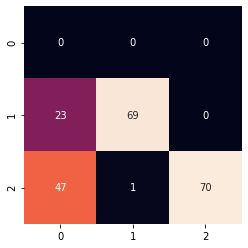

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(targets, labels)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)

### 2.g) Mezcla de Gaussianas

(2 pts) Clusterice los datos usando Mezcla de gaussianas, con el objetivo de clasificar el tipo de grano. Repita los pasos d) al g) usando este algoritmo. Compare con k-means y comente.

R: La mezcla de gaussianas tiene peor rendimiento que K-Means.

accuracy GaussianMixture 0.38095238095238093 



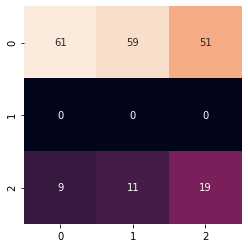

In [181]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from scipy.stats import mode
import seaborn as sns

gmm = GaussianMixture(n_components=3).fit(df_scaled)
clusters = gmm.predict(df_scaled)

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]


acc=accuracy_score(targets,labels)
print("accuracy GaussianMixture",acc,"\n")
mat = confusion_matrix(targets, labels)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)

### 2.i) Manifold

(2 pts) Proyecte los datos usando el método de manifold TSNE. Compare k-means y mezcla de gaussianas usando esta proyección. ¿La proyección mejora los resultados?
Comente.

R: La proyección mejoró los resultados de K-Means y gaussianas de inmediato, por lo que la consideraría bastante útil para mejorar la presición del modelo.

In [182]:
from sklearn.manifold import TSNE
 
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
data_proj = tsne.fit_transform(df_scaled)

accuracy KMeans 0.7 



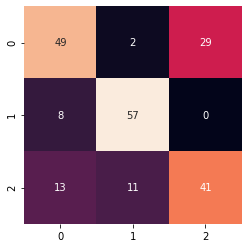

In [183]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_proj)
 
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]


acc=accuracy_score(targets,labels)
print("accuracy KMeans",acc,"\n")
mat = confusion_matrix(targets, labels)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)

accuracy GaussianMixture 0.6476190476190476 



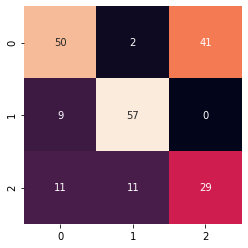

In [184]:
gmm = GaussianMixture(n_components=3).fit(data_proj)
clusters = gmm.predict(data_proj)

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]


acc=accuracy_score(targets,labels)
print("accuracy GaussianMixture",acc,"\n")
mat = confusion_matrix(targets, labels)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)